<a href="https://colab.research.google.com/github/aesamolyk/Transplant-Patient-Outcomes/blob/main/ML_Transplant_Outcomes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# load packages
import pandas as pd
import numpy as np
import pandas as pd
from numpy import *
from scipy.stats import mannwhitneyu
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
import statsmodels.api as sm


In [ ]:
# connect to source
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load data
from scipy.io.arff import loadarff
import pandas as pd

data = loadarff('/content/drive/My Drive/bone-marrow.arff')
df = pd.DataFrame(data[0])


In [ ]:
# preview data
df.head()

,Recipientgender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,ABOmatch,...,extcGvHD,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,survival_status
0,b'1',b'1',22.830137,b'0',b'1',b'0',b'1',b'1',b'1',b'0',...,b'1',7.20,1.338760,5.38,35.0,19.0,51.0,32.0,999.0,0.0
1,b'1',b'0',23.342466,b'0',b'1',b'0',b'-1',b'-1',b'1',b'0',...,b'1',4.50,11.078295,0.41,20.6,16.0,37.0,1000000.0,163.0,1.0
2,b'1',b'0',26.394521,b'0',b'1',b'0',b'-1',b'-1',b'1',b'0',...,b'1',7.94,19.013230,0.42,23.4,23.0,20.0,1000000.0,435.0,1.0
3,b'0',b'0',39.684932,b'1',b'1',b'0',b'1',b'2',b'1',b'1',...,b'?',4.25,29.481647,0.14,50.0,23.0,29.0,19.0,53.0,1.0
4,b'0',b'1',33.358904,b'0',b'0',b'0',b'1',b'2',b'0',b'1',...,b'1',51.85,3.972255,13.05,9.0,14.0,14.0,1000000.0,2043.0,0.0


In [ ]:
df.columns

Index(['Recipientgender', 'Stemcellsource', 'Donorage', 'Donorage35', 'IIIV',
       'Gendermatch', 'DonorABO', 'RecipientABO', 'RecipientRh', 'ABOmatch',
       'CMVstatus', 'DonorCMV', 'RecipientCMV', 'Disease', 'Riskgroup',
       'Txpostrelapse', 'Diseasegroup', 'HLAmatch', 'HLAmismatch', 'Antigen',
       'Alel', 'HLAgrI', 'Recipientage', 'Recipientage10', 'Recipientageint',
       'Relapse', 'aGvHDIIIIV', 'extcGvHD', 'CD34kgx10d6', 'CD3dCD34',
       'CD3dkgx10d8', 'Rbodymass', 'ANCrecovery', 'PLTrecovery',
       'time_to_aGvHD_III_IV', 'survival_time', 'survival_status'],
      dtype='object')

In [ ]:
# removing "b" prefix
df = df.apply(lambda x: x.str.decode('utf-8') if x.dtype == 'O' else x)

In [ ]:
df.head()

,Recipientgender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,ABOmatch,...,extcGvHD,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,survival_status
0,1,1,22.830137,0,1,0,1,1,1,0,...,1,7.20,1.338760,5.38,35.0,19.0,51.0,32.0,999.0,0.0
1,1,0,23.342466,0,1,0,-1,-1,1,0,...,1,4.50,11.078295,0.41,20.6,16.0,37.0,1000000.0,163.0,1.0
2,1,0,26.394521,0,1,0,-1,-1,1,0,...,1,7.94,19.013230,0.42,23.4,23.0,20.0,1000000.0,435.0,1.0
3,0,0,39.684932,1,1,0,1,2,1,1,...,?,4.25,29.481647,0.14,50.0,23.0,29.0,19.0,53.0,1.0
4,0,1,33.358904,0,0,0,1,2,0,1,...,1,51.85,3.972255,13.05,9.0,14.0,14.0,1000000.0,2043.0,0.0


In [ ]:
# indicate missing values
df.replace('?', pd.NA, inplace=True)

In [ ]:
# data shape
print ("# of records:", len(df))
print ("dataset shape:", df.shape)


# of records: 187
dataset shape: (187, 37)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Recipientgender       187 non-null    object 
 1   Stemcellsource        187 non-null    object 
 2   Donorage              187 non-null    float64
 3   Donorage35            187 non-null    object 
 4   IIIV                  187 non-null    object 
 5   Gendermatch           187 non-null    object 
 6   DonorABO              187 non-null    object 
 7   RecipientABO          186 non-null    object 
 8   RecipientRh           185 non-null    object 
 9   ABOmatch              186 non-null    object 
 10  CMVstatus             171 non-null    object 
 11  DonorCMV              185 non-null    object 
 12  RecipientCMV          173 non-null    object 
 13  Disease               187 non-null    object 
 14  Riskgroup             187 non-null    object 
 15  Txpostrelapse         1

In [ ]:
# sum missing data
df.isnull().sum()

Recipientgender          0
Stemcellsource           0
Donorage                 0
Donorage35               0
IIIV                     0
Gendermatch              0
DonorABO                 0
RecipientABO             1
RecipientRh              2
ABOmatch                 1
CMVstatus               16
DonorCMV                 2
RecipientCMV            14
Disease                  0
Riskgroup                0
Txpostrelapse            0
Diseasegroup             0
HLAmatch                 0
HLAmismatch              0
Antigen                  1
Alel                     1
HLAgrI                   0
Recipientage             0
Recipientage10           0
Recipientageint          0
Relapse                  0
aGvHDIIIIV               0
extcGvHD                31
CD34kgx10d6              0
CD3dCD34                 5
CD3dkgx10d8              5
Rbodymass                2
ANCrecovery              0
PLTrecovery              0
time_to_aGvHD_III_IV     0
survival_time            0
survival_status          0
d

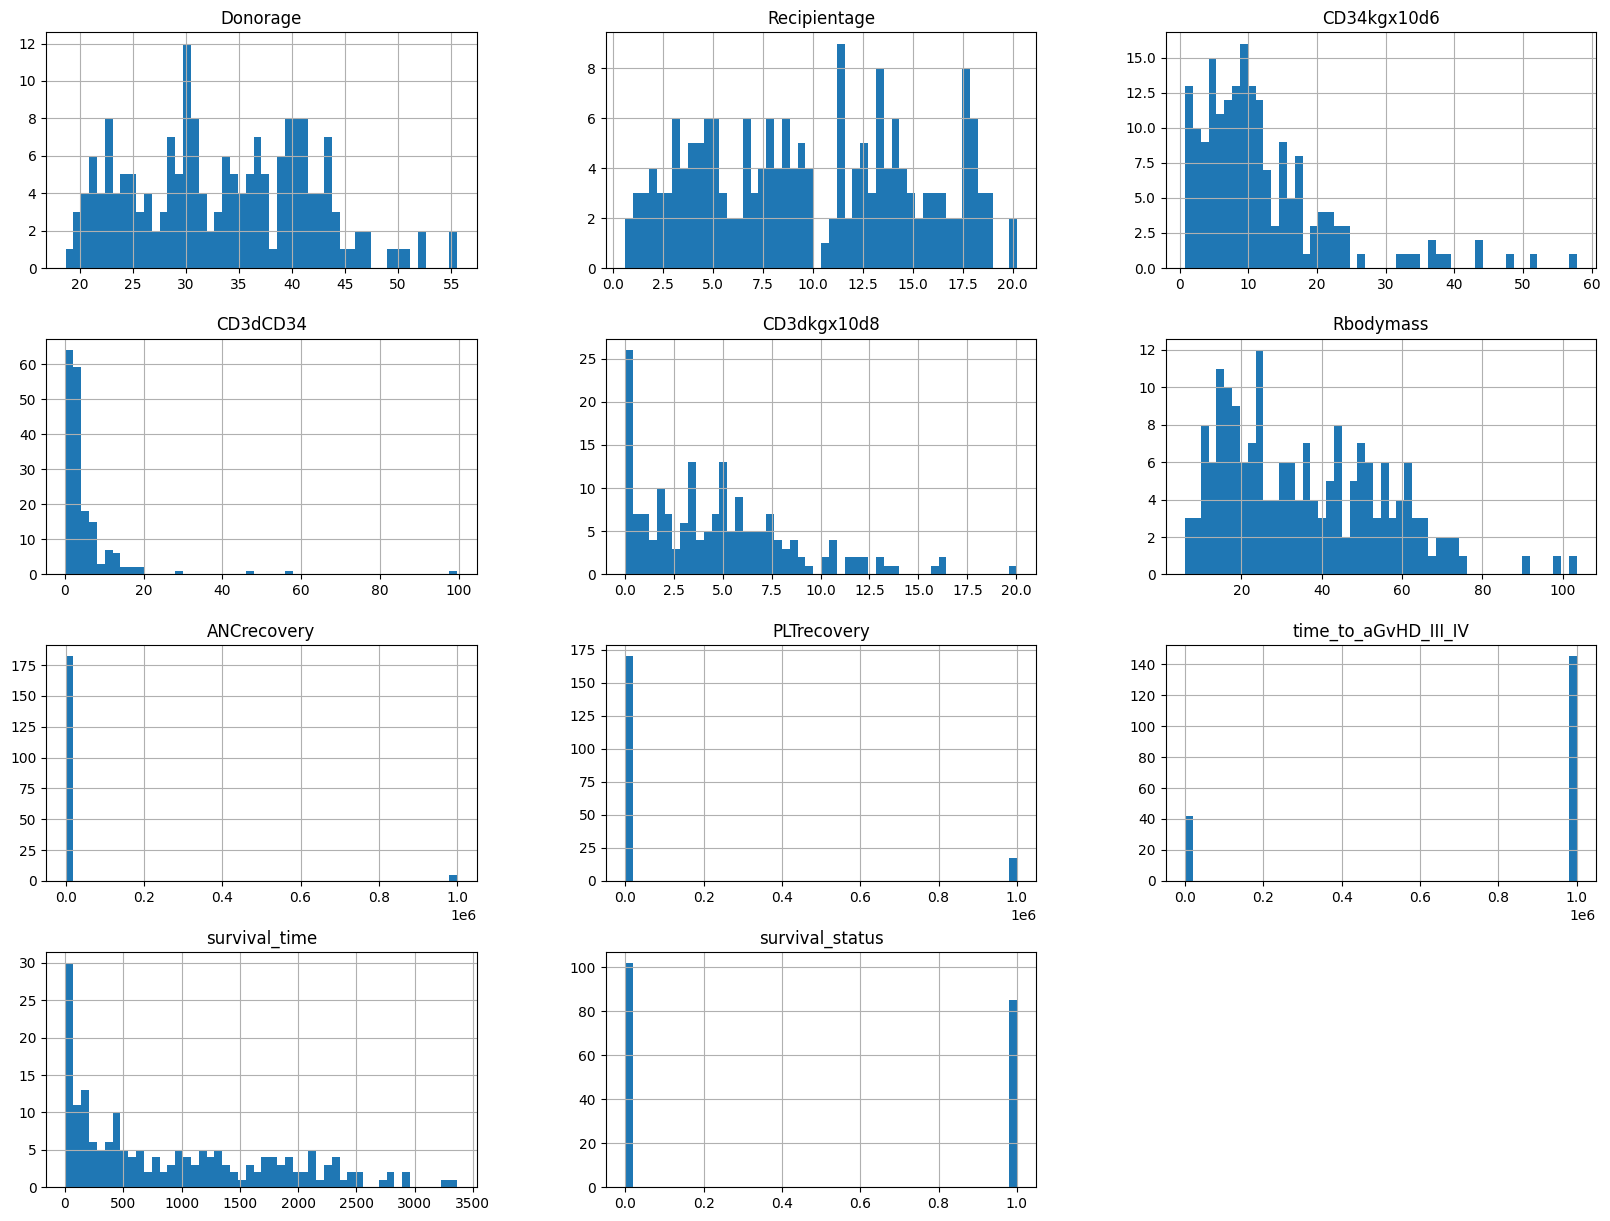

In [ ]:
# check distributions
df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
df['survival_status'].value_counts

<bound method IndexOpsMixin.value_counts of 0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
182    1.0
183    1.0
184    0.0
185    1.0
186    0.0
Name: survival_status, Length: 187, dtype: float64>

In [ ]:
# check attribute data types
df.dtypes


Recipientgender          object
Stemcellsource           object
Donorage                float64
Donorage35               object
IIIV                     object
Gendermatch              object
DonorABO                 object
RecipientABO             object
RecipientRh              object
ABOmatch                 object
CMVstatus                object
DonorCMV                 object
RecipientCMV             object
Disease                  object
Riskgroup                object
Txpostrelapse            object
Diseasegroup             object
HLAmatch                 object
HLAmismatch              object
Antigen                  object
Alel                     object
HLAgrI                   object
Recipientage            float64
Recipientage10           object
Recipientageint          object
Relapse                  object
aGvHDIIIIV               object
extcGvHD                 object
CD34kgx10d6             float64
CD3dCD34                float64
CD3dkgx10d8             float64
Rbodymas

In [ ]:
# fill missing values in with mean : convering to numeric
df_clean = df.apply(lambda x: pd.to_numeric(x, errors='coerce')).apply(lambda x: x.fillna(x.median()), axis=0)


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [ ]:
# check data types
df_clean.dtypes


Recipientgender           int64
Stemcellsource            int64
Donorage                float64
Donorage35                int64
IIIV                      int64
Gendermatch               int64
DonorABO                  int64
RecipientABO            float64
RecipientRh             float64
ABOmatch                float64
CMVstatus               float64
DonorCMV                float64
RecipientCMV            float64
Disease                 float64
Riskgroup                 int64
Txpostrelapse             int64
Diseasegroup              int64
HLAmatch                  int64
HLAmismatch               int64
Antigen                 float64
Alel                    float64
HLAgrI                    int64
Recipientage            float64
Recipientage10            int64
Recipientageint           int64
Relapse                   int64
aGvHDIIIIV                int64
extcGvHD                float64
CD34kgx10d6             float64
CD3dCD34                float64
CD3dkgx10d8             float64
Rbodymas

In [ ]:
# alter d types
cols = ["RecipientABO","RecipientRh","ABOmatch","CMVstatus","DonorCMV","RecipientCMV","Antigen",'Alel','extcGvHD','survival_status']

data_types = {column: 'int' for column in cols}

df_clean[cols] = df_clean[cols].astype(data_types)




In [ ]:
# final data types check
df_clean.dtypes

Recipientgender           int64
Stemcellsource            int64
Donorage                float64
Donorage35                int64
IIIV                      int64
Gendermatch               int64
DonorABO                  int64
RecipientABO              int64
RecipientRh               int64
ABOmatch                  int64
CMVstatus                 int64
DonorCMV                  int64
RecipientCMV              int64
Disease                 float64
Riskgroup                 int64
Txpostrelapse             int64
Diseasegroup              int64
HLAmatch                  int64
HLAmismatch               int64
Antigen                   int64
Alel                      int64
HLAgrI                    int64
Recipientage            float64
Recipientage10            int64
Recipientageint           int64
Relapse                   int64
aGvHDIIIIV                int64
extcGvHD                  int64
CD34kgx10d6             float64
CD3dCD34                float64
CD3dkgx10d8             float64
Rbodymas

In [ ]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.1 MB/s eta 0:00:00


In [ ]:
# hash encoder for cateogrical vars
import category_encoders as ce


categorical_vars = ['RecipientABO', 'Disease', 'DonorABO',"CMVstatus","HLAmatch","Antigen","Alel","HLAgrI"]


hashing_encoder = ce.HashingEncoder(cols=categorical_vars, n_components=5)


hash_encoded = hashing_encoder.fit_transform(df_clean[categorical_vars])


hash_encoded_df = pd.concat([df_clean.drop(categorical_vars, axis=1), hash_encoded], axis=1)

In [ ]:
# apply log transformation to non normall distributed vars

log_vars = ['Rbodymass', 'CD34kgx10d6', 'CD3dCD34','CD3dkgx10d8']


hash_encoded_log_df = hash_encoded_df.copy()


hash_encoded_log_df[log_vars ] = np.log1p(hash_encoded_log_df[log_vars ])

In [ ]:
hash_encoded_log_df.head()

,Recipientgender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,RecipientRh,ABOmatch,DonorCMV,RecipientCMV,...,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,survival_status,col_0,col_1,col_2,col_3,col_4
0,1,1,22.830137,0,1,0,1,0,1,1,...,19.0,51.0,32.0,999.0,0,3,0,1,4,0
1,1,0,23.342466,0,1,0,1,0,0,0,...,16.0,37.0,1000000.0,163.0,1,3,0,1,4,0
2,1,0,26.394521,0,1,0,1,0,0,1,...,23.0,20.0,1000000.0,435.0,1,2,0,2,4,0
3,0,0,39.684932,1,1,0,1,1,1,0,...,23.0,29.0,19.0,53.0,1,2,0,2,4,0
4,0,1,33.358904,0,0,0,0,1,0,1,...,14.0,14.0,1000000.0,2043.0,0,2,0,2,4,0


In [ ]:
alive_subset = df_clean[df_clean['survival_status'] == 0]

alive_subset.describe()

,Recipientgender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,ABOmatch,...,extcGvHD,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,survival_status
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,...,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.0
mean,0.588235,0.823529,33.017325,0.392157,0.568627,0.166667,0.401961,0.264706,0.813725,0.754902,...,0.892157,13.215520,4.596283,5.534461,31.591667,15.245098,35.637255,813731.539216,1527.725490,0.0
std,0.494583,0.383103,7.838176,0.490642,0.497714,0.374518,0.881715,0.953643,0.391251,0.432270,...,0.311714,10.358876,10.004343,4.093025,17.288918,2.645513,45.535709,391237.946459,712.147028,0.0
min,0.000000,0.000000,18.646575,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.790000,0.204132,0.040000,6.000000,11.000000,10.000000,11.000000,433.000000,0.0
25%,0.000000,1.000000,27.463014,0.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,...,1.000000,6.885000,1.786683,2.352500,17.725000,14.000000,15.000000,1000000.000000,999.250000,0.0
50%,1.000000,1.000000,31.708219,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,11.110000,2.704808,5.080000,26.850000,15.000000,20.000000,1000000.000000,1428.000000,0.0
75%,1.000000,1.000000,40.165068,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,16.602500,4.161697,7.410000,46.400000,17.000000,31.250000,1000000.000000,2041.250000,0.0
max,1.000000,1.000000,55.553425,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,...,1.000000,57.780000,99.560970,20.020000,71.000000,24.000000,285.000000,1000000.000000,3364.000000,0.0


In [ ]:
deceased_subset = df_clean[df_clean['survival_status'] == 1]

deceased_subset.describe()

,Recipientgender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,ABOmatch,...,extcGvHD,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,survival_status
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,...,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.0
mean,0.611765,0.717647,34.017760,0.505882,0.635294,0.176471,0.376471,0.282353,0.905882,0.682353,...,0.800000,10.303294,6.175753,3.774471,40.786471,58838.011765,200020.658824,729419.847059,231.964706,1.0
std,0.490241,0.452816,8.779817,0.502933,0.484204,0.383482,0.786440,0.920814,0.293725,0.468324,...,0.402374,9.162378,8.787334,3.201224,20.975997,236686.892113,402363.517635,446886.962399,248.528452,0.0
min,0.000000,0.000000,19.506849,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.820000,0.368720,0.050000,9.600000,9.000000,9.000000,10.000000,6.000000,1.0
25%,0.000000,0.000000,26.394521,0.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000,...,1.000000,4.540000,1.849607,0.980000,23.400000,13.000000,17.000000,62.000000,58.000000,1.0
50%,1.000000,1.000000,35.087671,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,7.910000,2.734462,3.470000,39.300000,15.000000,27.000000,1000000.000000,149.000000,1.0
75%,1.000000,1.000000,40.052055,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,11.340000,7.243234,5.410000,54.900000,18.000000,48.000000,1000000.000000,330.000000,1.0
max,1.000000,1.000000,55.402740,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,...,1.000000,48.630000,56.065024,16.070000,103.400000,1000000.000000,1000000.000000,1000000.000000,1243.000000,1.0


In [ ]:
# review of relationships between variables
# distribution check shows most are not-normally distriputed ; use non-parametric statistical test
corr_matrix = df_clean.corr(method='spearman')

corr_matrix

,Recipientgender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,ABOmatch,...,extcGvHD,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,survival_status
Recipientgender,1.000000,0.030200,-0.070541,-0.081501,-0.024048,0.371818,-0.000969,-0.052788,-0.118859,0.052220,...,0.084706,-0.051036,-0.143306,0.040324,0.075296,0.007622,0.102797,-0.045372,-0.047499,0.023905
Stemcellsource,0.030200,1.000000,0.025400,0.016551,0.056345,-0.061681,0.173655,0.099821,-0.111713,-0.105223,...,-0.010371,0.595116,-0.519158,0.627887,-0.091636,-0.400410,-0.419701,0.026968,0.045815,-0.126335
Donorage,-0.070541,0.025400,1.000000,0.860560,-0.066094,0.094956,-0.079639,0.087462,0.011556,-0.059918,...,0.090232,0.047476,0.076821,-0.011006,0.056237,0.079060,0.021286,0.026677,-0.013431,0.046753
Donorage35,-0.081501,0.016551,0.860560,1.000000,-0.015619,0.051350,-0.069746,0.051758,0.091377,-0.046118,...,0.043070,0.014256,0.052240,-0.040377,0.085943,0.047416,0.035732,0.017739,-0.088728,0.113976
IIIV,-0.024048,0.056345,-0.066094,-0.015619,1.000000,-0.004803,0.064461,0.039991,0.036355,-0.142596,...,-0.190506,0.052653,-0.067510,0.024255,-0.022842,-0.043494,-0.088835,-0.415399,-0.035776,0.067730
Gendermatch,0.371818,-0.061681,0.094956,0.051350,-0.004803,1.000000,-0.084727,0.076468,-0.015338,0.155234,...,-0.008299,-0.181100,-0.158086,0.020386,0.023938,0.035971,0.080187,-0.077046,-0.072467,0.012962
DonorABO,-0.000969,0.173655,-0.079639,-0.069746,0.064461,-0.084727,1.000000,0.047633,-0.143008,-0.000706,...,0.093274,0.220566,-0.039586,0.149842,-0.107067,-0.210006,-0.166568,0.013882,-0.001856,-0.004025
RecipientABO,-0.052788,0.099821,0.087462,0.051758,0.039991,0.076468,0.047633,1.000000,-0.066323,-0.059027,...,-0.100928,0.045282,-0.101456,0.118675,-0.011733,0.026699,-0.025137,-0.158401,-0.032679,0.012176
RecipientRh,-0.118859,-0.111713,0.011556,0.091377,0.036355,-0.015338,-0.143008,-0.066323,1.000000,-0.051208,...,0.040816,-0.235343,-0.054679,-0.101185,0.062293,-0.022247,-0.028076,-0.002700,-0.139093,0.130556
ABOmatch,0.052220,-0.105223,-0.059918,-0.046118,-0.142596,0.155234,-0.000706,-0.059027,-0.051208,1.000000,...,0.040605,0.003648,0.058592,0.000995,-0.054947,0.077590,0.020033,0.055079,-0.000111,-0.080626


In [ ]:
corr_matrix = df_clean.corr()
corr_matrix['survival_time'].sort_values(ascending=False)

survival_time           1.000000
aGvHDIIIIV              0.144717
CD34kgx10d6             0.139313
time_to_aGvHD_III_IV    0.131168
HLAmismatch             0.078839
CD3dkgx10d8             0.060680
HLAmatch                0.054196
Antigen                 0.054135
CD3dCD34                0.045630
CMVstatus               0.043668
Alel                    0.037890
HLAgrI                  0.037884
RecipientCMV            0.036486
extcGvHD                0.025821
ABOmatch                0.019025
DonorABO                0.016415
Diseasegroup            0.009649
Donorage                0.005603
DonorCMV                0.001939
Txpostrelapse           0.001266
Stemcellsource         -0.041253
Donorage35             -0.041369
Riskgroup              -0.048790
Recipientgender        -0.060487
RecipientABO           -0.060551
IIIV                   -0.064272
Recipientageint        -0.070310
Recipientage10         -0.075985
Gendermatch            -0.110597
RecipientRh            -0.129768
Recipienta

In [ ]:
corr_matrix = df_clean.corr()
corr_matrix['survival_status'].sort_values(ascending=False)

survival_status         1.000000
PLTrecovery             0.346395
Relapse                 0.309201
Rbodymass               0.234851
Recipientage            0.203406
ANCrecovery             0.181569
Recipientage10          0.150616
Riskgroup               0.147706
Recipientageint         0.142410
RecipientRh             0.130556
Txpostrelapse           0.115936
Donorage35              0.113976
CD3dCD34                0.083196
Diseasegroup            0.072587
RecipientCMV            0.070048
IIIV                    0.067730
Donorage                0.060384
HLAmatch                0.037013
Alel                    0.035276
HLAgrI                  0.033588
CMVstatus               0.031486
Antigen                 0.025525
Recipientgender         0.023905
Gendermatch             0.012962
RecipientABO            0.009409
HLAmismatch             0.008209
DonorABO               -0.015193
DonorCMV               -0.060193
ABOmatch               -0.080626
time_to_aGvHD_III_IV   -0.100601
aGvHDIIIIV

In [ ]:
df['survival_time'].describe()

count     187.000000
mean      938.743316
std       849.589495
min         6.000000
25%       168.500000
50%       676.000000
75%      1604.000000
max      3364.000000
Name: survival_time, dtype: float64

# ** Normalize & Dimensionality Reduction**



In [ ]:
# normalize features data
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# removing Y
drop_cols = ['survival_time','survival_status']
x_to_normalize = hash_encoded_log_df.drop(drop_cols, axis=1).copy()

scaler = StandardScaler()
x_normalized = scaler.fit_transform(x_to_normalize)


In [ ]:
# find the right number of dimensions
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_normalized)

cumsum = np.cumsum(pca.explained_variance_ratio_)

d = np.argmax(cumsum >= .95) + 1
d

21

In [ ]:
# apply PCA
pca = PCA(n_components=21)

In [ ]:
X2D = pca.fit_transform(x_normalized)

In [ ]:
columns = [f'PC{i+1}' for i in range(21)]
X_pca_df = pd.DataFrame(data=X2D, columns=columns)

In [ ]:
y = hash_encoded_log_df.values[:, 28]

## **Build & Evaluate Models**

KNN: 0.643333 (0.098939)
KNN AUC: 0.6906911375661375 (0.10070430079431661)
KNN Precision: 0.7483333333333333 (0.23810011899759032)
KNN Recall: 0.3047619047619047 (0.11990169820965878)
LR: 0.765238 (0.119865)
LR AUC: 0.81630291005291 (0.14076688021197262)
LR Precision: 0.7796031746031746 (0.17518950974161432)
LR Recall: 0.6738095238095239 (0.18008879140333983)
SVM: 0.745238 (0.097293)
SVM AUC: 0.8186177248677249 (0.1267849768341819)
SVM Precision: 0.7343650793650793 (0.1401615389173705)
SVM Recall: 0.6738095238095239 (0.18008879140333983)
DT: 0.626190 (0.111050)
DT AUC: 0.6176587301587302 (0.11794228926845365)
DT Precision: 0.5495238095238094 (0.12494352465710855)
DT Recall: 0.5714285714285714 (0.16426846010152707)
RF: 0.704762 (0.084970)
RF AUC: 0.7727347883597884 (0.0694655127558601)
RF Precision: 0.710952380952381 (0.16182140711430462)
RF Recall: 0.5547619047619048 (0.11715156762040517)


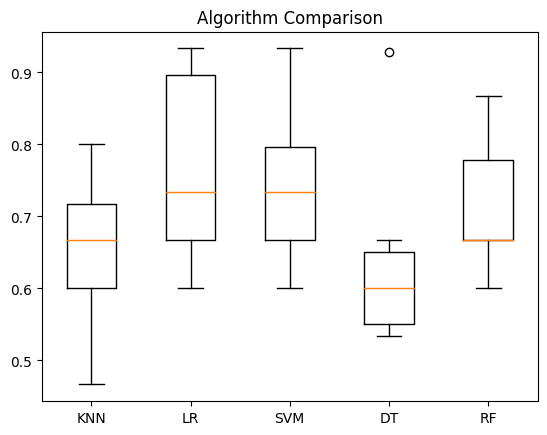

In [ ]:
# compare algorithms
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


X_train, X_validation, Y_train, Y_validation = train_test_split(X_pca_df, y, test_size=0.20, shuffle=True, random_state=112)

models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr',random_state=112)))
models.append(('SVM', SVC(gamma='auto', kernel='linear',random_state=112)))
models.append(('DT', DecisionTreeClassifier(random_state=112)))
models.append(('RF', RandomForestClassifier(random_state=112)))


# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=112, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

    auc_scores = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='roc_auc')
    print(f'{name} AUC: {auc_scores.mean()} ({auc_scores.std()})')

    precision_scores = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='precision')
    print(f'{name} Precision: {precision_scores.mean()} ({precision_scores.std()})')

    recall_scores = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='recall')
    print(f'{name} Recall: {recall_scores.mean()} ({recall_scores.std()})')

# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [ ]:
# feature importance using random forest

from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

# removing Y
drop_col = ['survival_time','survival_status']
x_rf = hash_encoded_log_df.drop(drop_col, axis=1).copy()

# isolate Y
y_rf = hash_encoded_log_df.values[:, 28]

forest_reg.fit(X=x_rf, y=y_rf)



RandomForestRegressor()

In [ ]:
# print out features
feature_importances = forest_reg.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': x_rf.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                 Feature  Importance
25           PLTrecovery    0.161798
17               Relapse    0.105081
14          Recipientage    0.100553
20           CD34kgx10d6    0.084042
2               Donorage    0.076858
23             Rbodymass    0.075346
24           ANCrecovery    0.066045
22           CD3dkgx10d8    0.054025
21              CD3dCD34    0.049103
29                 col_2    0.030462
27                 col_0    0.027886
19              extcGvHD    0.025992
26  time_to_aGvHD_III_IV    0.019491
6            RecipientRh    0.015929
30                 col_3    0.013724
10             Riskgroup    0.009957
8               DonorCMV    0.009801
4                   IIIV    0.008603
13           HLAmismatch    0.008573
16       Recipientageint    0.007698
18            aGvHDIIIIV    0.006656
11         Txpostrelapse    0.006023
9           RecipientCMV    0.005889
0        Recipientgender    0.005281
28                 col_1    0.004673
12          Diseasegroup    0.004388
3

In [ ]:
# select top features to use for algorithms
x_feat_imp = hash_encoded_log_df[['PLTrecovery', 'Relapse', 'Recipientage', 'CD34kgx10d6', 'Donorage', 'ANCrecovery', 'Rbodymass','CD3dkgx10d8']]

# normalize the inputs
scaler = StandardScaler()
x_feat_imp_norm = scaler.fit_transform(x_feat_imp)

KNN: 0.723810 (0.095902)
KNN AUC: 0.747718253968254 (0.14844690165180044)
KNN Precision: 0.7421428571428572 (0.17325105975207025)
KNN Recall: 0.5571428571428572 (0.16976708066643703)
LR: 0.778095 (0.108676)
LR AUC: 0.772255291005291 (0.12372286899464989)
LR Precision: 0.8585714285714285 (0.15175167685588004)
LR Recall: 0.6047619047619047 (0.2045957243708651)
SVM: 0.744286 (0.080476)
SVM AUC: 0.7203703703703704 (0.15841729528237886)
SVM Precision: 0.885 (0.15137334272879385)
SVM Recall: 0.47380952380952374 (0.16476809787424718)
DT: 0.717143 (0.076907)
DT AUC: 0.70625 (0.08208562581449026)
DT Precision: 0.6866269841269841 (0.11415971476922356)
DT Recall: 0.6333333333333333 (0.1674132936309233)
RF: 0.730000 (0.110000)
RF AUC: 0.7638558201058202 (0.1542116491125047)
RF Precision: 0.7714285714285715 (0.21412361593830403)
RF Recall: 0.5714285714285714 (0.24257686908476248)


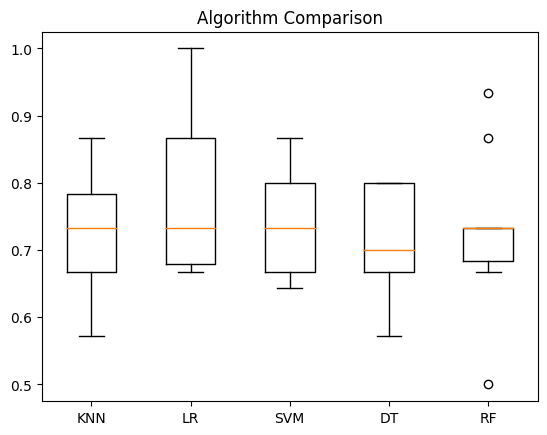

In [ ]:
# compare algorithms
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


X_train, X_validation, Y_train, Y_validation = train_test_split(x_feat_imp_norm, y, test_size=0.20, shuffle=True, random_state=112)

models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr',random_state=112)))
models.append(('SVM', SVC(gamma='auto', kernel='linear',random_state=112)))
models.append(('DT', DecisionTreeClassifier(random_state=112)))
models.append(('RF', RandomForestClassifier(random_state=112)))


# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=112, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

    auc_scores = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='roc_auc')
    print(f'{name} AUC: {auc_scores.mean()} ({auc_scores.std()})')

    precision_scores = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='precision')
    print(f'{name} Precision: {precision_scores.mean()} ({precision_scores.std()})')

    recall_scores = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='recall')
    print(f'{name} Recall: {recall_scores.mean()} ({recall_scores.std()})')

# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()